In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

emissions = pd.read_csv("Datasets/historical_emissions.csv")


In [6]:
emissions.head()

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,31.12,32.74,32.58,31.75,...,15.98,15.06,14.22,13.23,12.18,11.73,11.68,11.55,11.90,11.63
1,AFG,Afghanistan,Climate Watch,Total including LUCF,All GHG,MtCO₂e,31.27,32.89,32.74,31.91,...,13.59,12.68,11.83,10.84,9.79,9.34,9.29,9.16,9.51,9.24
2,AFG,Afghanistan,Climate Watch,Energy,All GHG,MtCO₂e,10.89,13.43,13.13,12.18,...,1.16,1.36,1.38,1.45,1.50,1.57,1.64,1.68,2.14,2.28
3,AFG,Afghanistan,Climate Watch,Industrial Processes,All GHG,MtCO₂e,1.38,1.21,1.08,0.91,...,0.12,0.11,0.10,0.08,0.07,0.06,0.06,0.06,0.06,0.05
4,AFG,Afghanistan,Climate Watch,Agriculture,All GHG,MtCO₂e,15.15,14.48,14.84,15.21,...,12.79,11.75,10.95,9.98,8.95,8.52,8.48,8.40,8.39,8.07


In [7]:
removed_country_codes = [
    "ABW",
    "AFG",
    "ARM",
    "ASM",
    "AZE",
    "BIH",
    "BLR",
    "CHI",
    "CUB",
    "CUW",
    "CYM",
    "CZE",
    "DJI",
    "ERI",
    "EST",
    "GEO",
    "GIB",
    "GUM",
    "HRV",
    "IMN",
    "KAZ",
    "KGZ",
    "LAO",
    "LBN",
    "LTU",
    "LVA",
    "MAC",
    "MAF",
    "MDA",
    "MKD",
    "MNE",
    "MNP",
    "MOZ",
    "POL",
    "PRK",
    "PSE",
    "ROU",
    "SMR",
    "SRB",
    "SSD",
    "SVK",
    "SVN",
    "SXM",
    "TCA",
    "TJK",
    "TKM",
    "TLS",
    "UKR",
    "UZB",
    "VEN",
    "VGB",
    "VIR",
    "VNM",
    "XKX",
    "YEM"
]


In [8]:
len(emissions)

11058

In [9]:
emissions = emissions[~emissions["ISO"].isin(removed_country_codes)]

In [10]:
len(emissions)

8949

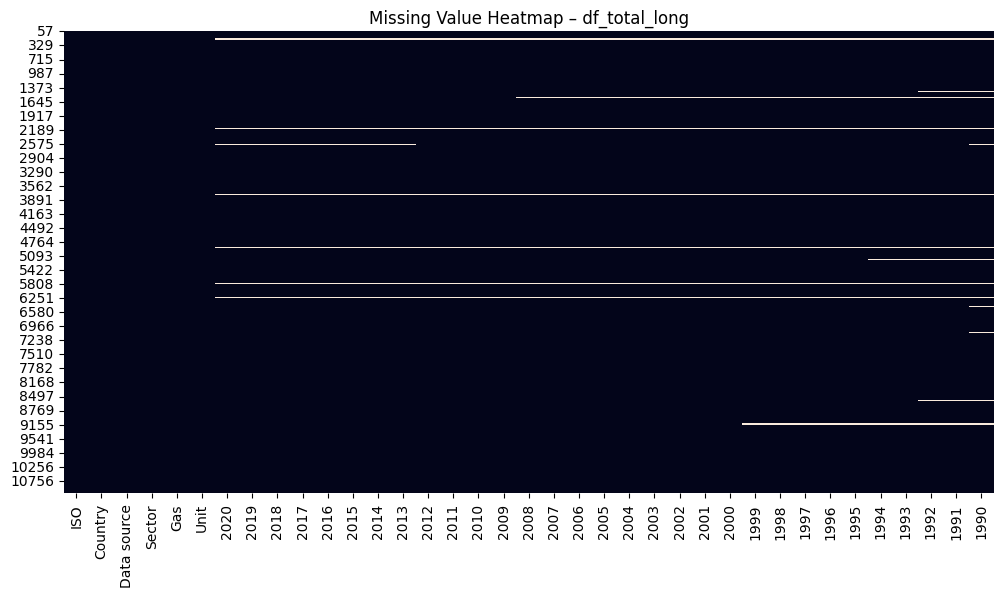

In [11]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(emissions.isna(), cbar=False)
plt.title("Missing Value Heatmap – df_total_long")
plt.show()


In [12]:
year_cols = [col for col in emissions.columns if col.isdigit()]

In [13]:
emissions = emissions[(emissions[year_cols] != 0).all(axis=1)]

In [14]:
len(emissions)

6139

In [15]:
emissions = emissions.dropna(subset=year_cols)

In [16]:
len(emissions)

5909

In [17]:
emissions.to_csv("cleaned_emissions.csv", index=False)

In [18]:
df_total = emissions[
    (emissions["Sector"] == "Total including LUCF") &
    (emissions["Gas"] == "All GHG")
]

In [19]:
df_total_long = df_total.melt(
    id_vars=["ISO", "Country"],
    value_vars=[col for col in emissions.columns if col.isdigit()],
    var_name="Year",
    value_name="Total_Emissions"
)


In [20]:
df_total_long.head()

,ISO,Country,Year,Total_Emissions
0,AGO,Angola,2020,119.41
1,ALB,Albania,2020,8.06
2,AND,Andorra,2020,0.58
3,ARE,United Arab Emirates,2020,249.93
4,ARG,Argentina,2020,394.76


In [21]:
df_total_long = df_total_long.sort_values(
    by=["Country", "Year"], ascending=[True, True]
).reset_index(drop=True)

In [22]:
df_total_long.head()

,ISO,Country,Year,Total_Emissions
0,ALB,Albania,1990,11.37
1,ALB,Albania,1991,9.01
2,ALB,Albania,1992,6.97
3,ALB,Albania,1993,6.94
4,ALB,Albania,1994,7.75


In [23]:
df_total_long.to_csv("cleaned_total_emissions.csv", index=False)

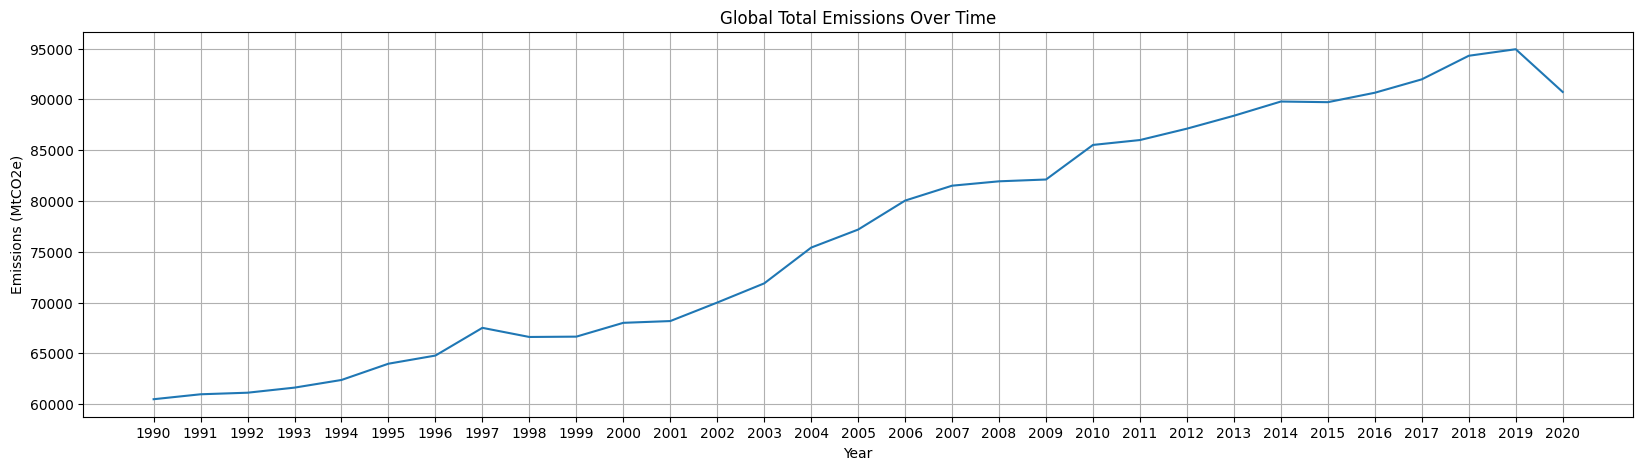

In [30]:
import matplotlib.pyplot as plt

global_trend = df_total_long.groupby("Year")["Total_Emissions"].sum()

plt.figure(figsize=(20,5))
plt.plot(global_trend.index, global_trend.values)
plt.title("Global Total Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2e)")
plt.grid(True)
plt.show()


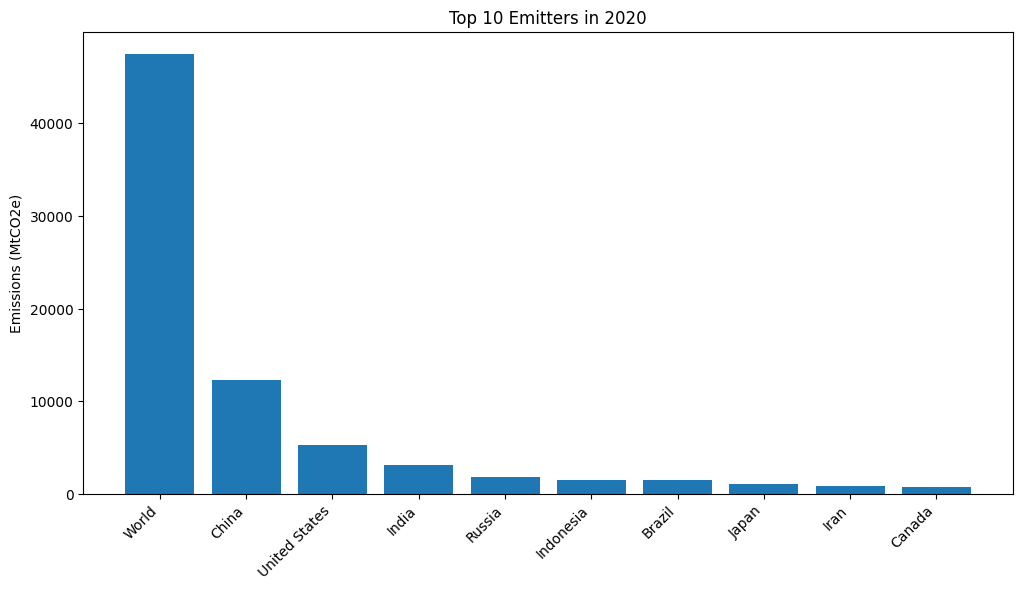

In [25]:
latest_year = df_total_long["Year"].max()

top10 = (
    df_total_long[df_total_long["Year"] == latest_year]
    .sort_values("Total_Emissions", ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
plt.bar(top10["Country"], top10["Total_Emissions"])
plt.xticks(rotation=45, ha="right")
plt.title(f"Top 10 Emitters in {latest_year}")
plt.ylabel("Emissions (MtCO2e)")
plt.show()


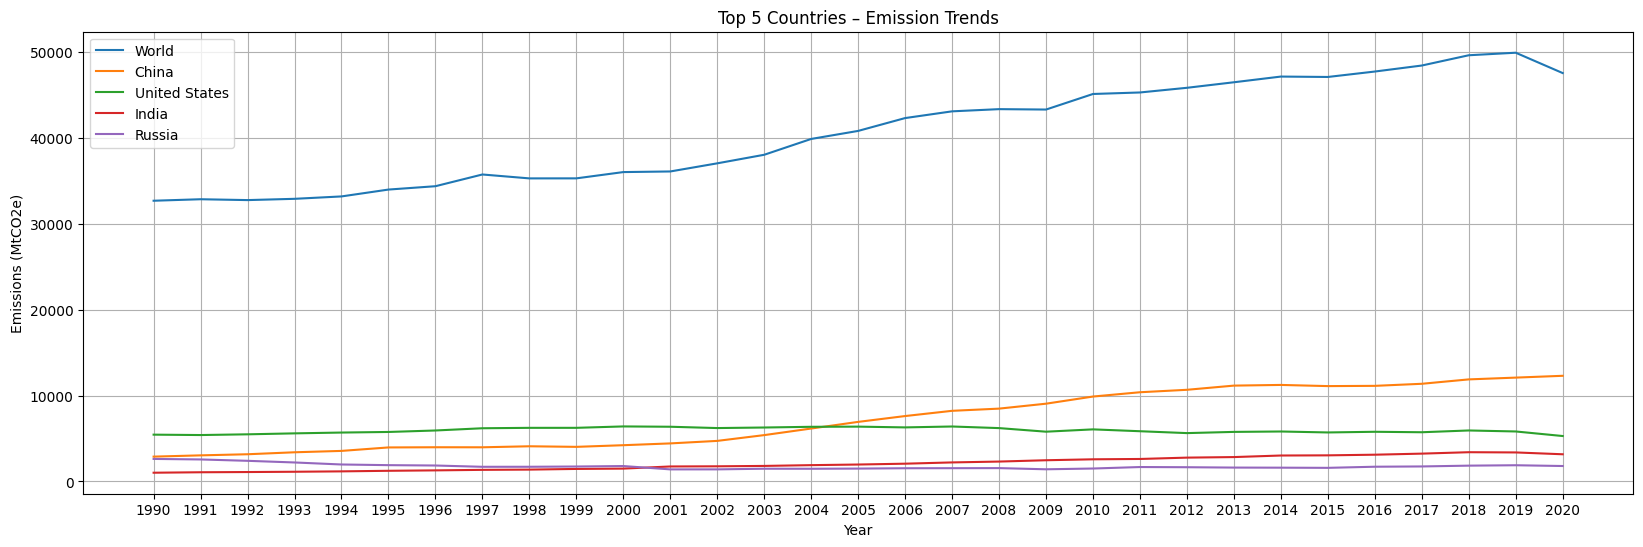

In [31]:
top5_countries = (
    df_total_long[df_total_long["Year"] == latest_year]
    .nlargest(5, "Total_Emissions")["Country"]
)

plt.figure(figsize=(20,6))

for c in top5_countries:
    subset = df_total_long[df_total_long["Country"] == c]
    plt.plot(subset["Year"], subset["Total_Emissions"], label=c)

plt.title("Top 5 Countries – Emission Trends")
plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2e)")
plt.legend()
plt.grid(True)
plt.show()


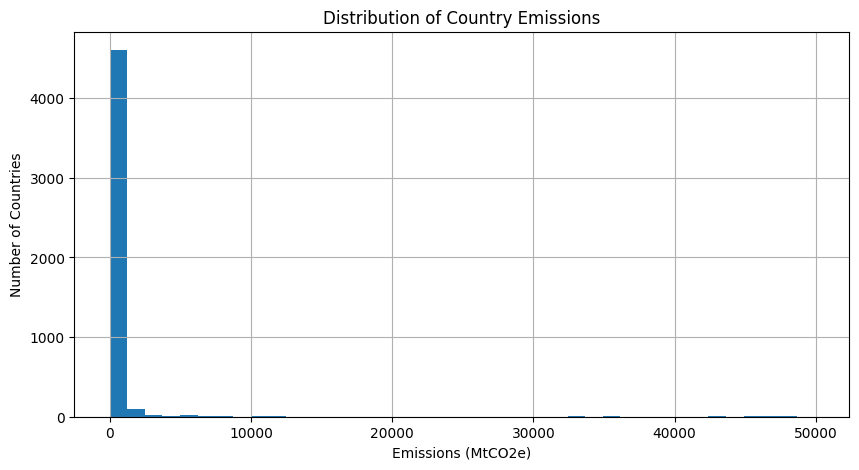

In [27]:
plt.figure(figsize=(10,5))
plt.hist(df_total_long["Total_Emissions"], bins=40)
plt.title("Distribution of Country Emissions")
plt.xlabel("Emissions (MtCO2e)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.show()


In [28]:
latest_year = df_total_long["Year"].max()

top10_latest = (
    df_total_long[df_total_long["Year"] == latest_year]
    .sort_values("Total_Emissions", ascending=False)  # Fixed
    .head(10)
)

top10_countries = top10_latest["Country"].tolist()

df_top10 = df_total_long[df_total_long["Country"].isin(top10_countries)].copy()

df_top10["Rank"] = df_top10.groupby("Year")["Total_Emissions"] \
                           .rank(method="min", ascending=False)

rank_pivot = df_top10.pivot(index="Year", columns="Country", values="Rank")

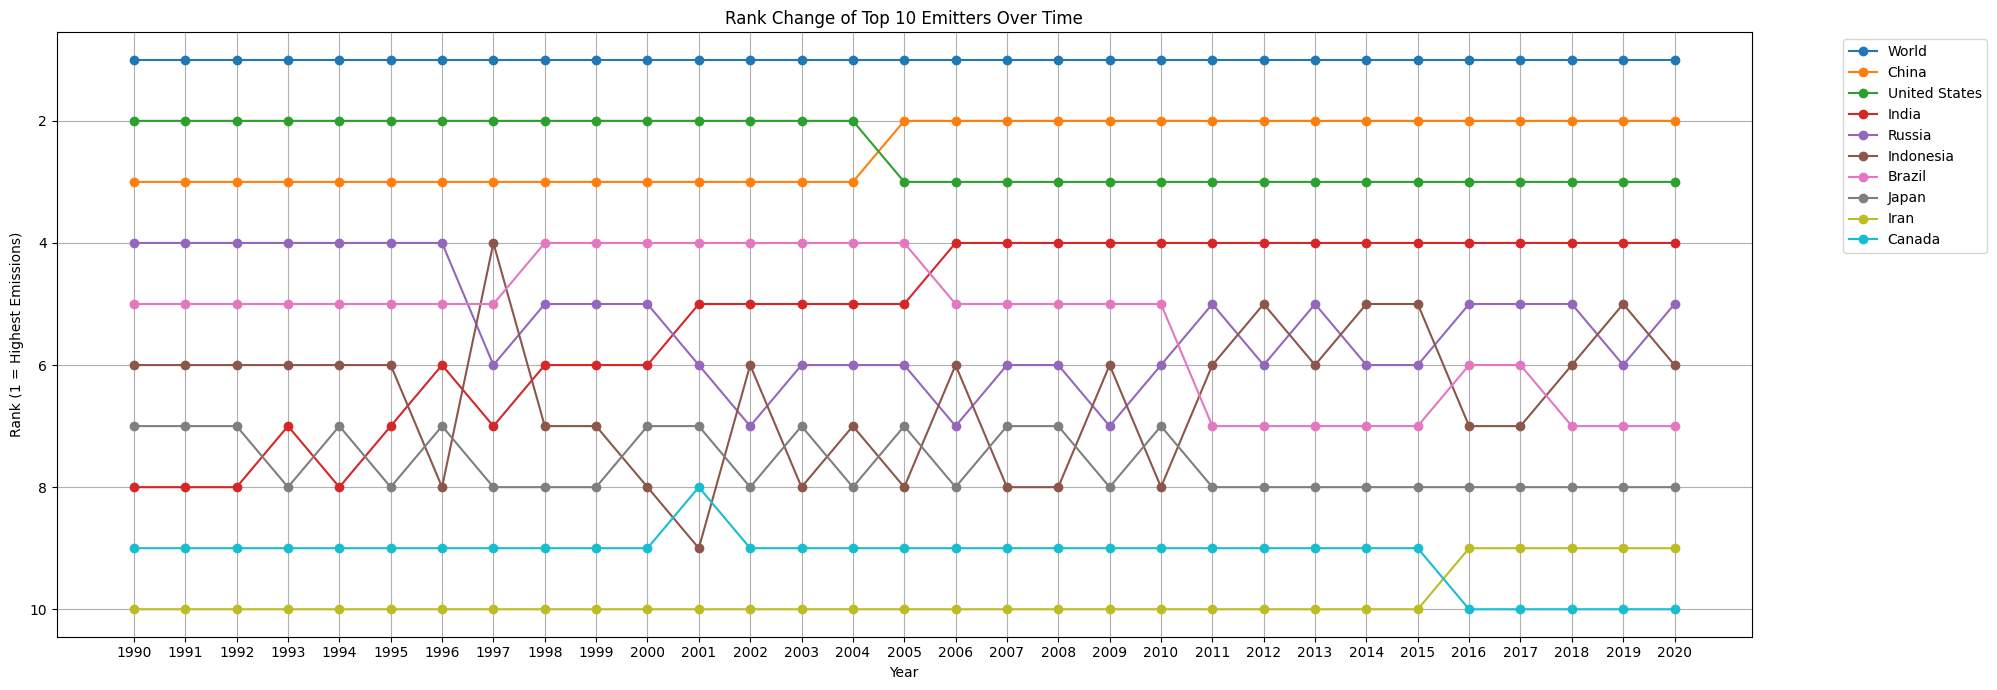

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))

for country in top10_countries:
    plt.plot(rank_pivot.index, rank_pivot[country], marker='o', label=country)

plt.gca().invert_yaxis()  # rank 1 at the top
plt.title("Rank Change of Top 10 Emitters Over Time")
plt.xlabel("Year")
plt.ylabel("Rank (1 = Highest Emissions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
